In [ ]:
%matplotlib inline # for Jupyter Notebook
import glob # to get all files in a directory
import pandas as pd # to handle dataframes
import matplotlib.pyplot as plt # for plotting

In [ ]:
csv_files = glob.glob('final_event_viz3_with_regions/viz3.csv') # get all CSV files in the directory
if not csv_files: # check if no files were found
    raise FileNotFoundError("No CSV file found at 'final_event_viz3_with_regions/viz3.csv'") # raise an error if no files found
df = pd.read_csv(csv_files[0], parse_dates=['event_date']) # read the first CSV file and parse the 'event_date' column as datetime

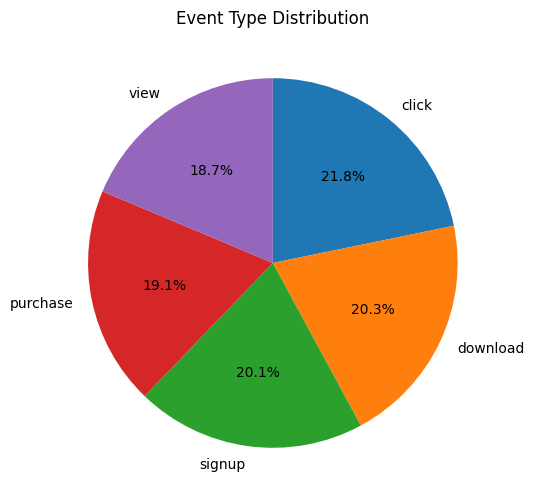

In [ ]:
# Pie chart for distribution of events by region

fig, ax = plt.subplots(figsize=(6,6)) # create a figure and axis for the pie chart
df['event_type'].value_counts().plot.pie( 
    ax=ax, autopct='%1.1f%%', startangle=90, counterclock=False
) # plot the pie chart with percentage labels, starting angle of 90 degrees, and counterclockwise rotation
ax.set_title('Event Type Distribution') # set the title of the pie chart
ax.set_ylabel('') # remove the y-label for better aesthetics
plt.show() # show the pie chart
fig.savefig('pie_event_type_distribution.png') # save the pie chart to a file

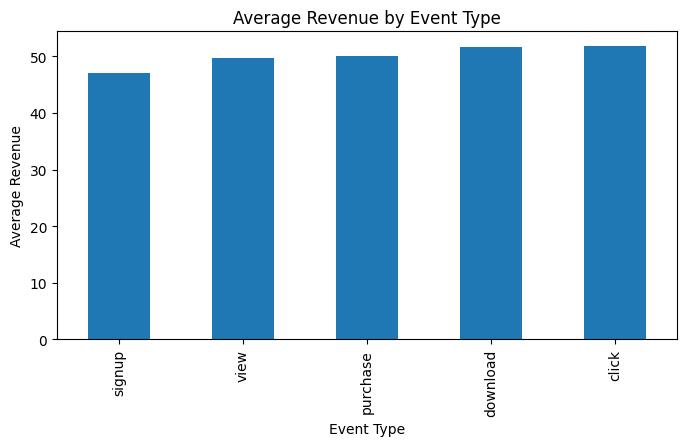

In [ ]:
# Bar chart for average revenue by event type

fig, ax = plt.subplots(figsize=(8,4)) # create a figure and axis for the bar chart
df.groupby('event_type')['avg_revenue'].mean().sort_values().plot.bar(ax=ax) # plot the bar chart
ax.set_xlabel('Event Type') # set the x-label
ax.set_ylabel('Average Revenue') # set the y-label
ax.set_title('Average Revenue by Event Type') # set the title
plt.show() # show the bar chart
fig.savefig('bar_avg_revenue_by_type.png') # save the bar chart to a file

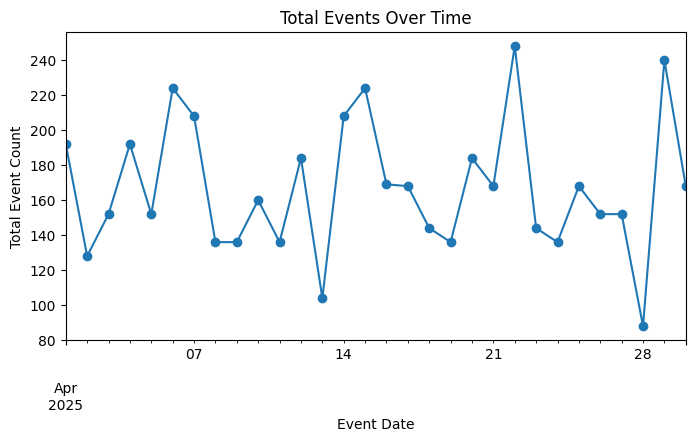

In [ ]:
# line chat for total events over time

fig, ax = plt.subplots(figsize=(8,4)) # create a figure and axis for the line chart
df.groupby('event_date')['cnt'].sum().plot(ax=ax, marker='o')   # plot the line chart with markers
ax.set_xlabel('Event Date') # set the x-axis label
ax.set_ylabel('Total Event Count') # set the y-axis label
ax.set_title('Total Events Over Time') # set the title
plt.show() # display the plot
fig.savefig('line_total_events_over_time.png') # save the line chart to a file

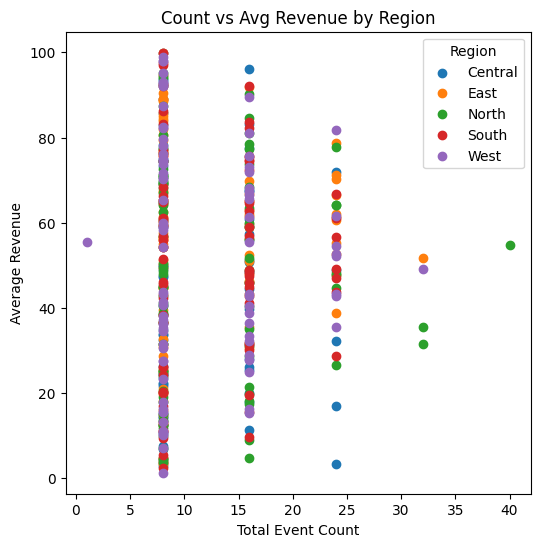

In [ ]:
# Scatter plot for count vs Average revenue by region

fig, ax = plt.subplots(figsize=(6,6)) # create a figure and axis for the scatter plot
for region, grp in df.groupby('region'): # group the data by region
    ax.scatter(grp['cnt'], grp['avg_revenue'], label=region)    # plot the scatter points for each region
ax.set_xlabel('Total Event Count') # set the x-axis label
ax.set_ylabel('Average Revenue') # set the y-axis label
ax.set_title('Count vs Avg Revenue by Region') # set the title
ax.legend(title='Region') # add a legend with title
plt.show() # display the plot
fig.savefig('scatter_count_vs_avg_revenue_by_region.png') # save the scatter plot to a file